In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense

Data Set Up

In [ ]:
df = pd.read_csv('cleanedtraining.csv')
labelencoder = LabelEncoder()
df['category'] = labelencoder.fit_transform(df['category'])


In [ ]:
features = ['amt', 'category', 'unix_time', 'merch_lat', 'merch_long']
X= df[features]
y = df['is_fraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(6, activation = 'relu', input_dim = (5)))
classifier.add(Dense( 6, activation = 'relu'))
classifier.add(Dense( 1, activation = 'linear'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy', 'precision'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 36        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 5)

Epoch 1/5


ValueError: ignored

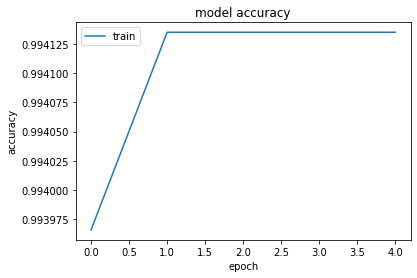

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3837/3837 [==============================] - 5s 1ms/step


[[122048      0]
 [   714      0]]


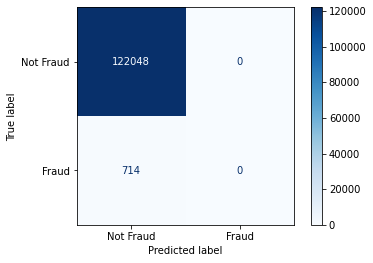

0.9941838679721738

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
labels = ['Not Fraud', 'Fraud']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()
accuracy_score(y_test,y_pred)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

[[122048      0]
 [   714      0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
df = pd.read_csv('fraud_data_test_cleaned.csv')
features = ['amt', 'category', 'unix_time', 'merch_lat', 'merch_long']
Xtest= df[features]
Ytest= df['is_fraud']
y_pred = classifier.predict(Xtest)
y_pred = (y_pred > 0.5)
labels = ['Fraud', 'Not Fraud']
cm = confusion_matrix(Ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()
print(cm)
accuracy_score(Ytest,y_pred)

FileNotFoundError: ignored